In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
import json
import boto3
import sagemaker
from sagemaker import get_execution_role

import pandas as pd
import numpy as np

from sqlalchemy import create_engine, text
from sqlalchemy.orm import sessionmaker

from sagemaker.feature_store.feature_group import FeatureGroup

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
import os
import io

import psycopg2
import gc

import pandas as pd
import numpy as np

from datetime import datetime

import numpy as np
import seaborn as sns

import matplotlib.pyplot as plt


from lifelines import KaplanMeierFitter
from lifelines import CoxPHFitter, WeibullAFTFitter
from sklearn.pipeline import Pipeline
from lifelines.utils.sklearn_adapter import sklearn_adapter


from sklearn.preprocessing import StandardScaler, Normalizer, StandardScaler, OrdinalEncoder
from sklearn.impute import SimpleImputer
from sagemaker.feature_store.feature_group import FeatureGroup


from sklearn.feature_extraction.text import _VectorizerMixin
from sklearn.feature_selection._base import SelectorMixin
from sklearn import set_config

# import time
# set_config(display='diagram') 


import requests
from requests.auth import HTTPBasicAuth


from sklearn.model_selection import train_test_split

from sklearn.preprocessing import OneHotEncoder, StandardScaler, Normalizer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, f1_score, precision_recall_fscore_support, roc_curve, precision_recall_curve


%matplotlib inline

In [3]:
df = pd.read_csv('dat.csv')

C:\Users\jmohd\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (121) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [4]:
df.dtypes

Unnamed: 0                                    int64
application_id                               object
medicare_number                              object
cancellation_model_prediction                 int64
probability_of_cancellation                 float64
duration_model_prediction                     int64
LTV                                         float64
sk_effective_date                            object
sk_end_date                                 float64
sk_submitted_date                            object
sk_termination_date                          object
coverage_duration                           float64
sk_owner_duration                             int64
sk_created_date                             float64
sk_agent                                      int64
sk_application_stage                          int64
sk_initiative                                 int64
sk_product                                    int64
sk_carrier                                    int64
plan_name   

In [5]:
input = ['owner_first_name \n','owner_last_name\n','sk_date_of_birth\n','owner_email\n','owner_phone\n','sk_created_date.1\n','sk_created_time\n','zip_code\n','city\n','sk_state\n','household_income\n','household_size\n','zipcode\n','state\n','lat\n','lng\n','timezone\n','radius_in_miles\n','population\n','population_density\n','land_area_in_sqmi\n','water_area_in_sqmi\n','housing_units\n','occupied_housing_units\n','median_home_value\n','median_household_income\n','annual_checkup\n','arthritis\n','binge_drinking\n','copd\n','cancer_except_skin\n','cervical_cancer_screening\n','cholesterol_screening\n','chronic_kidney_disease\n','colorectal_cancer_screening\n','core_preventive_services_for_older_men\n','core_preventive_services_for_older_women\n','coronary_heart_disease\n','current_asthma\n','current_smoking\n','dental_visit\n','diabetes\n','health_insurance\n','high_blood_pressure\n','high_cholesterol\n','mammography\n','mental_health\n','obesity\n','physical_health\n','physical_inactivity\n','sleep_lt_7_hours\n','stroke\n','taking_bp_medication\n','teeth_loss\n','ma_penetration_2020\n','ma_penetration_2021\n','delta_ma_enrolled\n','delta_ma_penetration_points\n','sk_owner_age\n','region\n','sk_owner_gender\n','phone\n','zip\n','tu_credit_score\n','tu_contact_score\n','tu_income\n','tu_no_children_prob\n','tu_education_years\n','tu_home_owner_prob\n','tu_home_value\n','tu_resident_years']

In [6]:
input

['owner_first_name \n',
 'owner_last_name\n',
 'sk_date_of_birth\n',
 'owner_email\n',
 'owner_phone\n',
 'sk_created_date.1\n',
 'sk_created_time\n',
 'zip_code\n',
 'city\n',
 'sk_state\n',
 'household_income\n',
 'household_size\n',
 'zipcode\n',
 'state\n',
 'lat\n',
 'lng\n',
 'timezone\n',
 'radius_in_miles\n',
 'population\n',
 'population_density\n',
 'land_area_in_sqmi\n',
 'water_area_in_sqmi\n',
 'housing_units\n',
 'occupied_housing_units\n',
 'median_home_value\n',
 'median_household_income\n',
 'annual_checkup\n',
 'arthritis\n',
 'binge_drinking\n',
 'copd\n',
 'cancer_except_skin\n',
 'cervical_cancer_screening\n',
 'cholesterol_screening\n',
 'chronic_kidney_disease\n',
 'colorectal_cancer_screening\n',
 'core_preventive_services_for_older_men\n',
 'core_preventive_services_for_older_women\n',
 'coronary_heart_disease\n',
 'current_asthma\n',
 'current_smoking\n',
 'dental_visit\n',
 'diabetes\n',
 'health_insurance\n',
 'high_blood_pressure\n',
 'high_cholesterol\n',


In [7]:
inp = []
for x in input:
    inp.append(x.replace(" ", ""))
print(list(inp))

['owner_first_name\n', 'owner_last_name\n', 'sk_date_of_birth\n', 'owner_email\n', 'owner_phone\n', 'sk_created_date.1\n', 'sk_created_time\n', 'zip_code\n', 'city\n', 'sk_state\n', 'household_income\n', 'household_size\n', 'zipcode\n', 'state\n', 'lat\n', 'lng\n', 'timezone\n', 'radius_in_miles\n', 'population\n', 'population_density\n', 'land_area_in_sqmi\n', 'water_area_in_sqmi\n', 'housing_units\n', 'occupied_housing_units\n', 'median_home_value\n', 'median_household_income\n', 'annual_checkup\n', 'arthritis\n', 'binge_drinking\n', 'copd\n', 'cancer_except_skin\n', 'cervical_cancer_screening\n', 'cholesterol_screening\n', 'chronic_kidney_disease\n', 'colorectal_cancer_screening\n', 'core_preventive_services_for_older_men\n', 'core_preventive_services_for_older_women\n', 'coronary_heart_disease\n', 'current_asthma\n', 'current_smoking\n', 'dental_visit\n', 'diabetes\n', 'health_insurance\n', 'high_blood_pressure\n', 'high_cholesterol\n', 'mammography\n', 'mental_health\n', 'obesity\

In [8]:
input_list = []
for x in inp:
    input_list.append(x.replace("\n", ""))
print(list(input_list))

['owner_first_name', 'owner_last_name', 'sk_date_of_birth', 'owner_email', 'owner_phone', 'sk_created_date.1', 'sk_created_time', 'zip_code', 'city', 'sk_state', 'household_income', 'household_size', 'zipcode', 'state', 'lat', 'lng', 'timezone', 'radius_in_miles', 'population', 'population_density', 'land_area_in_sqmi', 'water_area_in_sqmi', 'housing_units', 'occupied_housing_units', 'median_home_value', 'median_household_income', 'annual_checkup', 'arthritis', 'binge_drinking', 'copd', 'cancer_except_skin', 'cervical_cancer_screening', 'cholesterol_screening', 'chronic_kidney_disease', 'colorectal_cancer_screening', 'core_preventive_services_for_older_men', 'core_preventive_services_for_older_women', 'coronary_heart_disease', 'current_asthma', 'current_smoking', 'dental_visit', 'diabetes', 'health_insurance', 'high_blood_pressure', 'high_cholesterol', 'mammography', 'mental_health', 'obesity', 'physical_health', 'physical_inactivity', 'sleep_lt_7_hours', 'stroke', 'taking_bp_medicatio

timezone


In [9]:
dat = df[input_list]

In [10]:
dat.columns

Index(['owner_first_name', 'owner_last_name', 'sk_date_of_birth',
       'owner_email', 'owner_phone', 'sk_created_date.1', 'sk_created_time',
       'zip_code', 'city', 'sk_state', 'household_income', 'household_size',
       'zipcode', 'state', 'lat', 'lng', 'timezone', 'radius_in_miles',
       'population', 'population_density', 'land_area_in_sqmi',
       'water_area_in_sqmi', 'housing_units', 'occupied_housing_units',
       'median_home_value', 'median_household_income', 'annual_checkup',
       'arthritis', 'binge_drinking', 'copd', 'cancer_except_skin',
       'cervical_cancer_screening', 'cholesterol_screening',
       'chronic_kidney_disease', 'colorectal_cancer_screening',
       'core_preventive_services_for_older_men',
       'core_preventive_services_for_older_women', 'coronary_heart_disease',
       'current_asthma', 'current_smoking', 'dental_visit', 'diabetes',
       'health_insurance', 'high_blood_pressure', 'high_cholesterol',
       'mammography', 'mental_health',

In [11]:
dat['sk_date_of_birth'] = pd.to_datetime(dat['sk_date_of_birth'], format='%Y-%m-%d') 
X = dat.drop(['owner_first_name', 'owner_last_name','state','timezone','region','owner_email','sk_date_of_birth','lng','lat','owner_phone','zip_code','zipcode','sk_state','zip','sk_created_date.1','phone','tu_contact_score'], axis=1)

C:\Users\jmohd\AppData\Local\Temp/ipykernel_113108/2931624945.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dat['sk_date_of_birth'] = pd.to_datetime(dat['sk_date_of_birth'], format='%Y-%m-%d')


In [12]:
X.dtypes

sk_created_time                               int64
city                                        float64
household_income                            float64
household_size                              float64
radius_in_miles                             float64
population                                  float64
population_density                          float64
land_area_in_sqmi                           float64
water_area_in_sqmi                          float64
housing_units                               float64
occupied_housing_units                      float64
median_home_value                           float64
median_household_income                     float64
annual_checkup                              float64
arthritis                                   float64
binge_drinking                              float64
copd                                        float64
cancer_except_skin                          float64
cervical_cancer_screening                   float64
cholesterol_

In [13]:
X = X.fillna(222222)

In [14]:
X.loc[X['sk_owner_age']<0,'sk_owner_age']=0

In [15]:
X['sk_owner_age'].value_counts()

65.0        662
66.0        579
68.0        563
67.0        542
70.0        494
69.0        470
71.0        453
72.0        430
74.0        424
73.0        381
75.0        343
76.0        330
77.0        318
79.0        307
78.0        302
81.0        277
80.0        275
82.0        251
83.0        239
64.0        235
85.0        229
84.0        224
86.0        170
63.0        164
61.0        164
62.0        155
60.0        145
88.0        144
87.0        143
89.0        138
59.0        129
58.0        128
57.0         97
91.0         95
56.0         93
90.0         92
54.0         73
55.0         69
53.0         57
52.0         53
92.0         51
50.0         48
51.0         42
93.0         35
45.0         32
48.0         28
94.0         26
47.0         25
46.0         21
39.0         20
49.0         20
43.0         18
44.0         17
95.0         16
96.0         16
42.0         13
40.0         13
41.0         13
97.0         12
35.0         12
32.0         11
37.0         11
31.0    

In [16]:
(X < 0).apply(lambda x: any(x))

sk_created_time                             False
city                                        False
household_income                            False
household_size                              False
radius_in_miles                             False
population                                  False
population_density                          False
land_area_in_sqmi                           False
water_area_in_sqmi                          False
housing_units                               False
occupied_housing_units                      False
median_home_value                           False
median_household_income                     False
annual_checkup                              False
arthritis                                   False
binge_drinking                              False
copd                                        False
cancer_except_skin                          False
cervical_cancer_screening                   False
cholesterol_screening                       False


In [17]:
Y = df['mod_LTV']
Y = Y.fillna(222222)
Y = Y.astype('int')

In [18]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores)?
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                          Specs         Score
20       chronic_kidney_disease  1.054885e+09
44  delta_ma_penetration_points  1.034379e+09
38                       stroke  1.030534e+09
17           cancer_except_skin  9.051004e+08
24       coronary_heart_disease  8.871399e+08
16                         copd  8.682825e+08
25               current_asthma  8.242161e+08
28                     diabetes  7.516293e+08
35              physical_health  7.200897e+08
33                mental_health  7.168773e+08
40                   teeth_loss  6.825419e+08
15               binge_drinking  6.824194e+08
29             health_insurance  6.691872e+08
26              current_smoking  6.314591e+08
13               annual_checkup  5.676642e+08
8            water_area_in_sqmi  5.505255e+08
4               radius_in_miles  5.493612e+08
7             land_area_in_sqmi  5.354408e+08
45                 sk_owner_age  5.277658e+08
36          physical_inactivity  5.201197e+08


In [19]:
!pip install xgboost

In [20]:
import shap
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost.sklearn import XGBRegressor
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import tree

import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [21]:
model = XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.001)
# Fit the Model
model.fit(X, Y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [22]:
shap.initjs()


In [23]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)

In [24]:
i = 4
shap.force_plot(explainer.expected_value, shap_values[i], features=X.iloc[i], feature_names=X.columns)

In [25]:
X['sk_created_time'].value_counts()


1000000    20
1155614    13
1113457     6
1154951     6
1155524     6
           ..
1152302     1
1181224     1
1105009     1
1085713     1
1094824     1
Name: sk_created_time, Length: 8369, dtype: int64

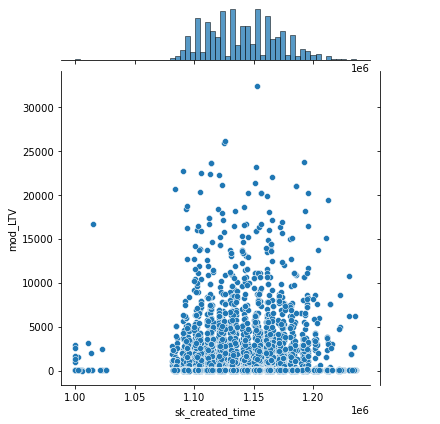

In [26]:
sns.jointplot(x=df['sk_created_time'], y= df['mod_LTV'],data=df)

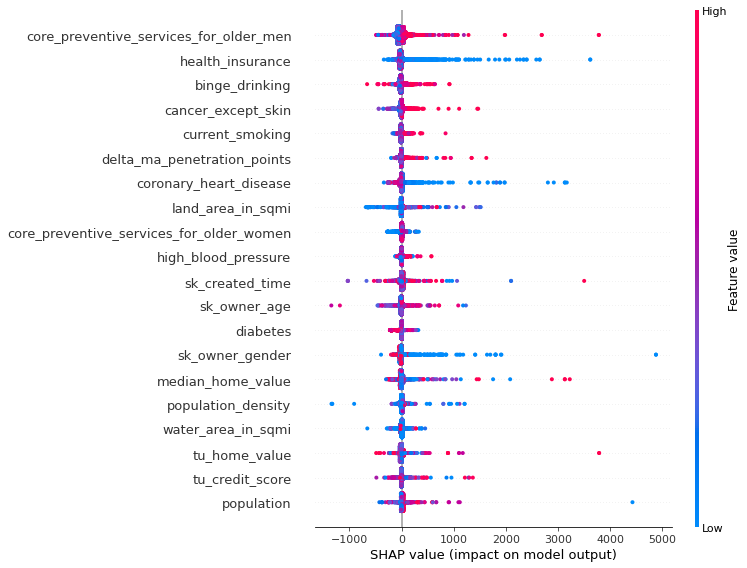

In [27]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns)

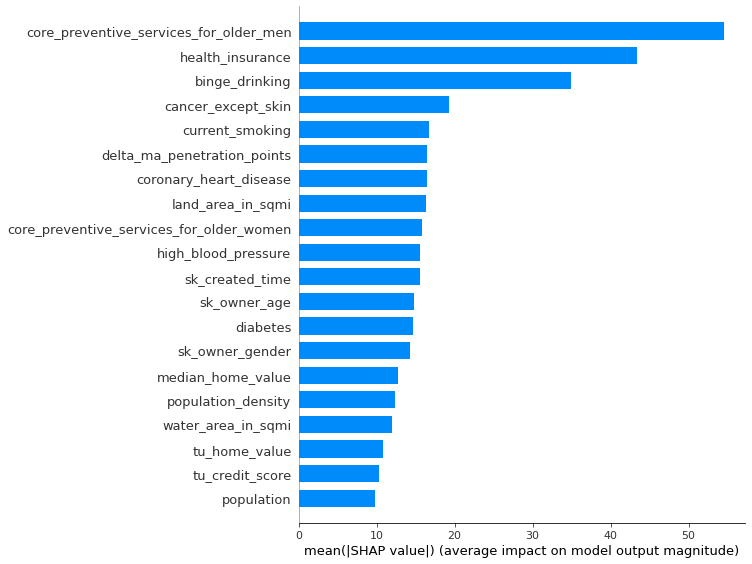

In [28]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns, plot_type='bar')

In [29]:
X.columns

Index(['sk_created_time', 'city', 'household_income', 'household_size',
       'radius_in_miles', 'population', 'population_density',
       'land_area_in_sqmi', 'water_area_in_sqmi', 'housing_units',
       'occupied_housing_units', 'median_home_value',
       'median_household_income', 'annual_checkup', 'arthritis',
       'binge_drinking', 'copd', 'cancer_except_skin',
       'cervical_cancer_screening', 'cholesterol_screening',
       'chronic_kidney_disease', 'colorectal_cancer_screening',
       'core_preventive_services_for_older_men',
       'core_preventive_services_for_older_women', 'coronary_heart_disease',
       'current_asthma', 'current_smoking', 'dental_visit', 'diabetes',
       'health_insurance', 'high_blood_pressure', 'high_cholesterol',
       'mammography', 'mental_health', 'obesity', 'physical_health',
       'physical_inactivity', 'sleep_lt_7_hours', 'stroke',
       'taking_bp_medication', 'teeth_loss', 'ma_penetration_2020',
       'ma_penetration_2021', 'delt

In [30]:
X.shape[1]

54

In [31]:
X

,sk_created_time,city,household_income,household_size,radius_in_miles,population,population_density,land_area_in_sqmi,water_area_in_sqmi,housing_units,occupied_housing_units,median_home_value,median_household_income,annual_checkup,arthritis,binge_drinking,copd,cancer_except_skin,cervical_cancer_screening,cholesterol_screening,chronic_kidney_disease,colorectal_cancer_screening,core_preventive_services_for_older_men,core_preventive_services_for_older_women,coronary_heart_disease,current_asthma,current_smoking,dental_visit,diabetes,health_insurance,high_blood_pressure,high_cholesterol,mammography,mental_health,obesity,physical_health,physical_inactivity,sleep_lt_7_hours,stroke,taking_bp_medication,teeth_loss,ma_penetration_2020,ma_penetration_2021,delta_ma_enrolled,delta_ma_penetration_points,sk_owner_age,sk_owner_gender,tu_credit_score,tu_income,tu_no_children_prob,tu_education_years,tu_home_owner_prob,tu_home_value,tu_resident_years
0,1130124,222222.0,222222.0,222222.0,13.000000,11165.0,51.0,220.09,0.30,4731.0,4393.0,108700.0,50060.0,72.75,30.30,17.5,7.6,8.60,83.00,77.9,3.30,60.05,29.55,29.35,8.2,8.45,15.9,61.85,12.35,13.95,35.35,36.45,65.75,11.35,38.5,12.45,26.45,31.90,3.8,79.60,14.40,8.96,9.87,81.0,0.91,68.0,10004,502.0,10000.0,100.0,13.0,0.0,222222.0,8.3
1,1132037,222222.0,222222.0,222222.0,2.000000,22095.0,2867.0,7.71,0.07,10001.0,8848.0,86200.0,32259.0,78.00,28.60,20.4,7.5,6.60,83.50,79.1,2.80,74.20,33.20,35.50,6.6,10.50,18.2,72.60,9.70,9.30,30.10,33.10,76.10,14.80,30.6,12.70,22.10,38.50,3.0,75.60,11.00,52.33,57.42,3055.0,5.09,71.0,10008,556.0,10000.0,100.0,13.0,0.0,350000.0,7.0
2,1110721,222222.0,222222.0,222222.0,2.000000,37275.0,5942.0,6.27,0.14,17681.0,15628.0,151700.0,42649.0,73.30,23.30,16.9,6.6,6.70,83.00,81.2,3.10,63.50,31.40,27.40,6.4,10.00,15.1,61.60,9.60,15.00,29.60,32.90,68.60,12.90,29.8,13.50,21.60,34.50,3.2,75.20,12.50,45.81,47.89,23208.0,2.08,102.0,10008,616.0,55000.0,0.0,13.0,100.0,220000.0,21.0
3,1110721,222222.0,222222.0,222222.0,2.000000,37275.0,5942.0,6.27,0.14,17681.0,15628.0,151700.0,42649.0,73.30,23.30,16.9,6.6,6.70,83.00,81.2,3.10,63.50,31.40,27.40,6.4,10.00,15.1,61.60,9.60,15.00,29.60,32.90,68.60,12.90,29.8,13.50,21.60,34.50,3.2,75.20,12.50,45.81,47.89,23208.0,2.08,102.0,10008,624.0,55000.0,0.0,13.0,100.0,220000.0,21.0
4,1221155,222222.0,222222.0,222222.0,3.000000,16898.0,2058.0,8.21,0.04,8139.0,7126.0,72500.0,34085.0,82.20,31.70,16.9,9.1,8.20,86.00,83.8,3.20,66.80,24.00,24.80,8.0,11.60,21.4,67.40,12.40,10.90,33.50,33.90,76.40,14.20,31.3,14.00,27.10,38.60,3.6,77.70,15.70,63.59,65.43,1498.0,1.84,73.0,10008,462.0,222222.0,222222.0,222222.0,222222.0,222222.0,222222.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11035,1103451,222222.0,222222.0,222222.0,0.965909,100820.0,66007.0,1.53,0.00,33227.0,31348.0,499600.0,47667.0,80.90,19.00,14.0,6.1,5.80,82.40,84.5,3.00,61.20,19.80,21.00,6.2,8.70,14.0,61.90,13.30,19.40,29.10,34.10,75.10,11.10,25.3,12.10,31.40,39.80,3.2,74.90,14.40,50.96,54.06,15205.0,3.10,84.0,10004,714.0,45000.0,100.0,12.0,100.0,900000.0,48.0
11036,1175820,222222.0,222222.0,222222.0,8.000000,17414.0,232.0,75.10,0.07,7047.0,6529.0,150800.0,51667.0,77.10,31.50,17.9,9.2,7.90,83.20,79.3,3.00,66.80,33.70,36.00,7.7,9.60,21.2,62.10,11.00,13.80,33.30,37.10,70.30,14.50,36.6,14.30,27.50,37.20,3.6,77.70,16.70,61.73,65.12,1122.0,3.39,81.0,10008,530.0,24000.0,100.0,13.0,90.0,191667.0,4.3
11037,1215925,222222.0,222222.0,222222.0,9.000000,21338.0,293.0,72.93,3.16,8987.0,8196.0,119400.0,45297.0,76.40,29.20,15.6,9.4,7.50,83.50,78.7,3.00,65.40,24.70,27.80,7.3,10.00,21.6,61.30,11.90,13.90,35.70,36.10,69.80,14.60,33.7,13.50,30.30,35.20,3.5,76.60,16.20,48.27,51.89,731.0,3.62,94.0,10004,476.0,222222.0,222222.0,222222.0,222222.0,222222.0,222222.0
11038,1114840,222222.0,222222.0,222222.0,3.000000,28954.0,2352.0,12.31,0.13,8651.0,8133.0,85800.0,4

In [32]:
df.dtypes

Unnamed: 0                                    int64
application_id                               object
medicare_number                              object
cancellation_model_prediction                 int64
probability_of_cancellation                 float64
duration_model_prediction                     int64
LTV                                         float64
sk_effective_date                            object
sk_end_date                                 float64
sk_submitted_date                            object
sk_termination_date                          object
coverage_duration                           float64
sk_owner_duration                             int64
sk_created_date                             float64
sk_agent                                      int64
sk_application_stage                          int64
sk_initiative                                 int64
sk_product                                    int64
sk_carrier                                    int64
plan_name   

Reg LTV

In [33]:
y = df['LTV']

In [34]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

bestfeatures = SelectKBest(score_func=chi2)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
# print(featureScores)?
print(featureScores.nlargest(20,'Score'))  #print 10 best features

                          Specs         Score
45                 sk_owner_age  5.858532e+08
13               annual_checkup  1.533734e+08
8            water_area_in_sqmi  1.242671e+08
4               radius_in_miles  1.240071e+08
7             land_area_in_sqmi  1.208551e+08
11            median_home_value  7.030107e+07
52                tu_home_value  5.238372e+07
50           tu_education_years  3.099912e+07
53            tu_resident_years  2.981593e+07
51           tu_home_owner_prob  2.864597e+07
49          tu_no_children_prob  2.864290e+07
10       occupied_housing_units  2.762710e+07
20       chronic_kidney_disease  2.619774e+07
44  delta_ma_penetration_points  2.569639e+07
38                       stroke  2.559968e+07
9                 housing_units  2.492018e+07
17           cancer_except_skin  2.247266e+07
24       coronary_heart_disease  2.204681e+07
16                         copd  2.158590e+07
25               current_asthma  2.047245e+07


In [35]:
model = XGBRegressor(n_estimators=1000, max_depth=10, learning_rate=0.001)
# Fit the Model
model.fit(X, y)

XGBRegressor(base_score=0.5, booster='gbtree', callbacks=None,
             colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, gamma=0, gpu_id=-1, grow_policy='depthwise',
             importance_type=None, interaction_constraints='',
             learning_rate=0.001, max_bin=256, max_cat_to_onehot=4,
             max_delta_step=0, max_depth=10, max_leaves=0, min_child_weight=1,
             missing=nan, monotone_constraints='()', n_estimators=1000,
             n_jobs=0, num_parallel_tree=1, predictor='auto', random_state=0,
             reg_alpha=0, reg_lambda=1, ...)

In [36]:
shap.initjs()
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X)
i = 4
shap.force_plot(explainer.expected_value, shap_values[i], features=X.iloc[i], feature_names=X.columns)



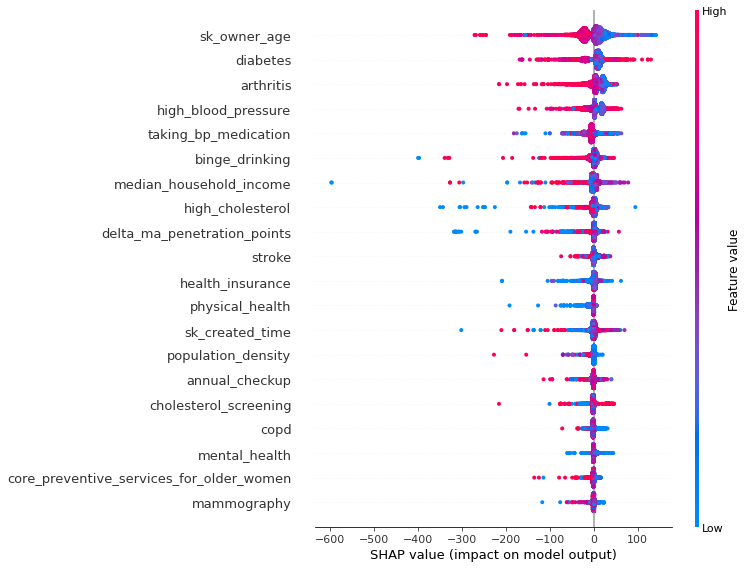

In [37]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns)

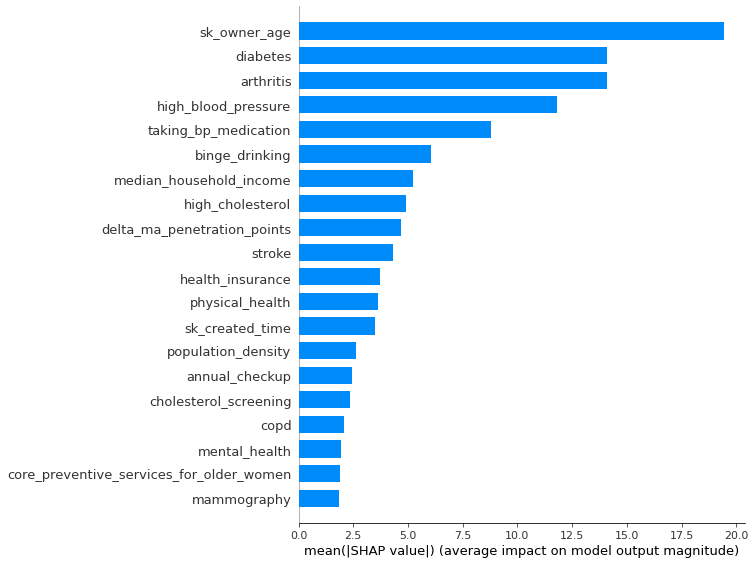

In [38]:
shap.summary_plot(shap_values, features=X, feature_names=X.columns, plot_type='bar')

In [39]:
1 - 2293/15585

0.8528713506576837

In [40]:
df.corr()

,Unnamed: 0,cancellation_model_prediction,probability_of_cancellation,duration_model_prediction,LTV,sk_end_date,coverage_duration,sk_owner_duration,sk_created_date,sk_agent,sk_application_stage,sk_initiative,sk_product,sk_carrier,sk_sold_status,sk_platform,owner_phone,premium,renewal,session_id_x,sk_created_date.1,sk_created_time,sk_modified_date,sk_modified_time,sk_process_date,sk_policy_source_platform,sk_source_platform,sk_app_policy_match_type,sk_application_match_flag,sk_policy_status,zip_code,city,sk_state,household_income,household_size,total_matched_calls,sk_call_campaign_first_touch,sk_call_campaign_last_touch,max_coverage_days,total_matched_leads,total_call_source_events,sk_first_event_platform,sk_last_event_platform,total_direct_call_source_events,sk_first_direct_event_platform,sk_last_direct_event_platform,applicant_count,bk_product,sk_product_category,sk_product_type,duration,carrier,zipcode,lat,lng,radius_in_miles,population,population_density,land_area_in_sqmi,water_area_in_sqmi,housing_units,occupied_housing_units,median_home_value,median_household_income,annual_checkup,arthritis,binge_drinking,copd,cancer_except_skin,cervical_cancer_screening,cholesterol_screening,chronic_kidney_disease,colorectal_cancer_screening,core_preventive_services_for_older_men,core_preventive_services_for_older_women,coronary_heart_disease,current_asthma,current_smoking,dental_visit,diabetes,health_insurance,high_blood_pressure,high_cholesterol,mammography,mental_health,obesity,physical_health,physical_inactivity,sleep_lt_7_hours,stroke,taking_bp_medication,teeth_loss,ma_penetration_2020,ma_penetration_2021,delta_ma_enrolled,delta_ma_penetration_points,event_time,sk_owner_age,submitted_month,effective_month,submitted_year,effective_year,sk_owner_cancellation,churn,year1_commission,year1_replacement_commission,year2_and_beyond_commission,year7_and_beyond_commission,2022_star_ratings_overall,screenings_tests_vaccines,managing_chronic_conditions,experience_with_plan,member_complaints,customer_service,number_of_plans_available,carrier_competition,sk_owner_gender,mod_LTV,year,phone,zip,tu_credit_score,tu_contact_score,tu_income,tu_no_children_prob,tu_education_years,tu_home_owner_prob,tu_home_value,tu_resident_years,r
Unnamed: 0,1.000000,-0.060155,-0.092640,0.015402,0.058069,-0.074712,-0.044601,-0.456864,0.267589,0.278239,-0.105294,NaN,0.031651,-0.080194,NaN,0.592964,0.017228,0.052747,NaN,NaN,0.266027,0.047835,0.196830,0.041969,-0.224018,0.554735,0.554735,0.143450,NaN,-0.045669,0.007289,NaN,-0.014599,NaN,NaN,-0.003769,0.097778,0.092774,-0.028309,0.065334,0.103566,0.081816,0.090185,-0.154780,-0.168026,-0.168026,NaN,0.107219,NaN,NaN,NaN,0.046218,0.007356,-1.233066e-02,-0.034805,0.015286,0.017081,0.023875,0.014967,-0.008838,0.008538,0.011455,0.034122,0.010334,-0.021628,-0.005699,-0.017241,0.001745,0.002331,-0.015535,0.020927,0.017939,-0.014179,-0.024701,-0.021034,0.006092,0.005050,-0.027439,-0.010127,0.012404,0.006877,-0.012290,-0.001718,-0.016199,-0.003890,-0.018297,0.015232,-0.007900,-0.003035,0.000363,-0.015326,-0.000803,0.017713,0.015751,0.006338,-0.019406,NaN,0.042764,0.047396,-0.276888,0.252657,0.563133,-0.065965,-0.101392,0.086510,0.090374,0.081842,NaN,-0.041788,0.035867,0.009700,-0.047727,-0.034110,NaN,0.058709,0.051082,0.033847,-0.113044,-3.019749e-02,0.017228,0.010990,0.062747,0.057804,0.012353,0.008151,-0.004387,-0.005939,0.040106,0.021378,NaN
cancellation_model_prediction,-0.060155,1.000000,0.932939,-0.809880,-0.865411,0.049549,-0.103258,-0.184701,-0.098847,-0.024913,0.154402,NaN,-0.012637,-0.075784,NaN,-0.100309,0.013229,-0.028550,NaN,NaN,-0.094174,-0.003719,-0.080244,-0.005981,-0.007012,-0.131091,-0.131091,-0.008002,NaN,0.410025,0.009716,NaN,-0.022295,NaN,NaN,0.003711,-0.030273,-0.020629,-0.002500,-0.021369,-0.039884,-0.024295,-0.026207,0.041410,0.043489,0.043489,NaN,-0.029685,NaN,NaN,NaN,-0.107159,0.009725,4.094800e-02,-0.003678,-0.005217,-0.020477,-0.019654,-0.013208,-0.006178,-0.024703,-0.021932,0.001518,0.028405,-0.008933,0.

In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11040 entries, 0 to 11039
Columns: 162 entries, Unnamed: 0 to r
dtypes: float64(77), int64(53), object(32)
memory usage: 13.6+ MB


In [42]:
X.isna().any()

sk_created_time                             False
city                                        False
household_income                            False
household_size                              False
radius_in_miles                             False
population                                  False
population_density                          False
land_area_in_sqmi                           False
water_area_in_sqmi                          False
housing_units                               False
occupied_housing_units                      False
median_home_value                           False
median_household_income                     False
annual_checkup                              False
arthritis                                   False
binge_drinking                              False
copd                                        False
cancer_except_skin                          False
cervical_cancer_screening                   False
cholesterol_screening                       False


In [43]:
df.isna().any()

Unnamed: 0                                  False
application_id                              False
medicare_number                              True
cancellation_model_prediction               False
probability_of_cancellation                 False
duration_model_prediction                   False
LTV                                         False
sk_effective_date                           False
sk_end_date                                  True
sk_submitted_date                           False
sk_termination_date                          True
coverage_duration                            True
sk_owner_duration                           False
sk_created_date                              True
sk_agent                                    False
sk_application_stage                        False
sk_initiative                               False
sk_product                                  False
sk_carrier                                  False
plan_name                                    True


In [55]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
X_train, X_test, y_train, y_test = train_test_split(X ,y , test_size=0.30)

In [56]:
from sklearn.linear_model import LinearRegression
model = LinearRegression()
mymodel = model.fit(X_train, y_train)
model.score(X_test, y_test)

-4629.590026001798

In [57]:
svm = SVC()
svm.fit(X_train, y_train)
svm.score(X_test, y_test)

0.051630434782608696

In [58]:
rfc = RandomForestClassifier(n_estimators=40)
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.24969806763285024

In [59]:
from sklearn.model_selection import KFold

In [61]:
kf = KFold(n_splits=3)
kf

KFold(n_splits=3, random_state=None, shuffle=False)

In [ ]:
# for train_index, test_index in kf.split([1,2,3,4,5,6,7,8,9])

In [62]:
def get_score(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    return model.score(X_test, y_test)

In [63]:
get_score(LinearRegression(), X_train, X_test, y_train, y_test)

-4629.590026001798

In [64]:
get_score(svm, X_train, X_test, y_train, y_test)

0.051630434782608696

In [65]:
get_score(rfc, X_train, X_test, y_train, y_test)

0.2524154589371981

In [69]:
from sklearn.model_selection import cross_val_score, cross_val_predict

In [72]:
pred = cross_val_predict(LinearRegression(), X_test, y_test)
pred

array([1344.50011331, 1333.88417365, 1408.19672571, ..., 1458.        ,
       1538.        , 1464.        ])

In [73]:
cross_val_score(LogisticRegression(), X_test, y_test,cv=3)

array([0.05072464, 0.05344203, 0.0634058 ])

In [74]:
cross_val_score(svm, X_test, y_test,cv=3)

array([0.05434783, 0.04981884, 0.05615942])

In [75]:
cross_val_score(rfc, X_test, y_test,cv=3)

array([0.13768116, 0.12681159, 0.12952899])

In [77]:
X_train.shape

(7728, 54)

In [78]:
y_train.shape

(7728,)

In [79]:
X_test.shape

(3312, 54)

In [84]:
from sklearn.metrics import accuracy_score, max_error, mean_absolute_error
mymodel.coef_
# mymodel.predict([[]])

array([ 3.12049204e-04, -3.04327177e-10,  4.92372375e-10,  3.96341986e-10,
        6.66748354e-01, -6.74397684e-04, -1.88187709e-03,  4.54330060e-02,
       -7.13781090e-01,  5.11346007e-03, -3.01912128e-03,  2.85935997e-05,
       -2.19738487e-04,  2.68862581e-04, -4.76218682e+00, -6.82959902e+00,
       -2.66869177e+01,  4.48172890e+01,  5.60290027e+00,  7.31651898e+00,
        7.37951816e+00, -2.70034972e+00, -1.47295810e+00,  1.95181874e-01,
        2.57743076e+01,  7.16134031e+00, -3.89707148e-01,  2.13815539e+00,
       -8.60614226e+00,  2.64898050e+00, -7.48757218e+00,  1.59929646e+00,
        2.74977691e+00,  2.45631281e+01,  4.04499428e+00, -7.52445384e+00,
        3.26109161e+00,  1.71208609e+00, -5.99922345e+01, -8.26529311e+00,
        7.01927832e+00,  2.39737916e+00, -3.71808715e+00,  1.53148859e-03,
       -6.11546631e+00,  2.55316528e-03,  4.36976526e+00, -2.01995253e-01,
        2.22622618e-04, -1.71268801e-01, -4.53552907e-04,  1.71333981e-01,
        1.06640542e-05,  